# Predicting Chronic Obstructive Pulmonary Disease (COPD) in Nepal.
To predict the likelihood of a patient developing Chronic Obstructive Pulmonary Disease (COPD) based on various risk factors and patient characteristics.

## Factors that lead to COPD
- Biomass Fuel Exposure (Indoor AIr pollution)
- Tobacco Smoking
- Outdoor Air pollution
- Occupational Exposure
- Genetic susceptability
- Respiratory Infections
- Low Awareness and health Access
- Climate and Environmental factors
## Signs and symptoms of COPD
Chronic Cough
- Shortness of Breath (Dyspnea)
- Excess mucus production (Sputum) (Phlegm)
- Wheezing
- Fatigue and low energy
- Chest tightness
- Frequent Respiratory Infections
- Cynosis (Bluish lips or Fingernail beds)
- Unintended Weight
- Chronic Bronchitis and Emphysema Symptoms
- Frequent Flare-ups (Exacerbations)

## Rationale for Using Synthetic Data:
- Due to the lack of available real-world datasets for COPD prediction in Nepal, where health data is not systematically recorded,
- synthetic data is used as a viable alternative. It allows for controlled simulations of patient profiles,
- facilitates model testing and validation, and addresses ethical concerns regarding patient privacy.
- This approach enables initial research efforts that can later inform real-world applications as actual data becomes available.


# Data preparation

In [77]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [78]:
# loading the dataset
df = pd.read_csv('synthetic_COPD_dataset_large.csv')
# verify
df.head()

,Age,Gender,Smoking_Status,Biomass_Fuel_Exposure,Occupational_Exposure,Family_History_COPD,BMI,Location,Air_Pollution_Level,Respiratory_Infections_Childhood,COPD_Diagnosis
0,45,Female,Current Smoker,No,No,No,27.950774,Urban,62,Yes,No
1,53,Male,Non-Smoker,No,No,Yes,21.509091,Rural,249,Yes,No
2,43,Male,Current Smoker,No,Yes,No,24.152229,Rural,264,No,No
3,65,Female,Current Smoker,Yes,No,No,22.615126,Rural,212,No,No
4,86,Male,Non-Smoker,Yes,No,Yes,33.213746,Rural,283,No,Yes


In [79]:
# exploring the datatype of each feature
df.dtypes

Age                                   int64
Gender                               object
Smoking_Status                       object
Biomass_Fuel_Exposure                object
Occupational_Exposure                object
Family_History_COPD                  object
BMI                                 float64
Location                             object
Air_Pollution_Level                   int64
Respiratory_Infections_Childhood     object
COPD_Diagnosis                       object
dtype: object

In [80]:
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique values ({len(values)}): {values}")
    print()

Column: Age
Unique values (50): [45 53 43 65 86 87 78 56 58 88 68 50 55 69 64 79 46 61 70 81 80 75 62 52
 41 48 67 74 60 71 73 47 77 76 40 49 51 84 42 57 59 83 85 66 63 72 54 82
 44 89]

Column: Gender
Unique values (2): ['Female' 'Male']

Column: Smoking_Status
Unique values (3): ['Current Smoker' 'Non-Smoker' 'Former Smoker']

Column: Biomass_Fuel_Exposure
Unique values (2): ['No' 'Yes']

Column: Occupational_Exposure
Unique values (2): ['No' 'Yes']

Column: Family_History_COPD
Unique values (2): ['No' 'Yes']

Column: BMI
Unique values (30000): [27.95077358 21.5090914  24.15222876 ... 33.73636564 26.14401596
 33.04013876]

Column: Location
Unique values (2): ['Urban' 'Rural']

Column: Air_Pollution_Level
Unique values (250): [ 62 249 264 212 283 126 107 288 263 239 293 281  91 206 183  65 108  72
 216  89  81  52 250  55 181 197 150 182 219 191  68 268 143 276 115 243
 192 207 279 226 104 234 144  82 117 152 187  50 203 286 146 228 205 110
  58 299 147 165 159 247 196  79 132 252 259

In [81]:
# Checking the distribution of the target variable (Churn)
print("Distribution of the target variable (COPD_Diagnosis):")
df['COPD_Diagnosis'].value_counts()

Distribution of the target variable (COPD_Diagnosis):


COPD_Diagnosis
No     20879
Yes     9121
Name: count, dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to all categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Check encoded dataframe
df.head()


,Age,Gender,Smoking_Status,Biomass_Fuel_Exposure,Occupational_Exposure,Family_History_COPD,BMI,Location,Air_Pollution_Level,Respiratory_Infections_Childhood,COPD_Diagnosis
0,45,0,0,0,0,0,27.950774,1,62,1,0
1,53,1,2,0,0,1,21.509091,0,249,1,0
2,43,1,0,0,1,0,24.152229,0,264,0,0
3,65,0,0,1,0,0,22.615126,0,212,0,0
4,86,1,2,1,0,1,33.213746,0,283,0,1


In [84]:
# Convert BMI into categorical values directly
df['BMI'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                   labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to BMI feature
df['BMI'] = label_encoder.fit_transform(df['BMI'])

In [85]:
# feature engineering
# Creating a Pollution Exposure Index
df['Pollution_Exposure_Index'] = df['Air_Pollution_Level'] * df['Biomass_Fuel_Exposure']

# Creating a Risk Exposure Score by summing up key exposure features
df['Risk_Exposure_Score'] = df['Smoking_Status'] + df['Occupational_Exposure'] + df['Biomass_Fuel_Exposure']

df.head()

,Age,Gender,Smoking_Status,Biomass_Fuel_Exposure,Occupational_Exposure,Family_History_COPD,BMI,Location,Air_Pollution_Level,Respiratory_Infections_Childhood,COPD_Diagnosis,Pollution_Exposure_Index,Risk_Exposure_Score
0,45,0,0,0,0,0,2,1,62,1,0,0,0
1,53,1,2,0,0,1,0,0,249,1,0,0,2
2,43,1,0,0,1,0,0,0,264,0,0,0,1
3,65,0,0,1,0,0,0,0,212,0,0,212,1
4,86,1,2,1,0,1,1,0,283,0,1,283,3


In [86]:
# Export the final dataset ready for EDA
df.to_csv('final_copd_dataset.csv', index=False)


# EDA

In [87]:
# Load the final dataset
df = pd.read_csv('final_copd_dataset.csv')

In [98]:
df.head()

,Age,Gender,Smoking_Status,Biomass_Fuel_Exposure,Occupational_Exposure,Family_History_COPD,BMI,Location,Air_Pollution_Level,Respiratory_Infections_Childhood,COPD_Diagnosis,Pollution_Exposure_Index,Risk_Exposure_Score
0,45,0,0,0,0,0,2,1,62,1,0,0,0
1,53,1,2,0,0,1,0,0,249,1,0,0,2
2,43,1,0,0,1,0,0,0,264,0,0,0,1
3,65,0,0,1,0,0,0,0,212,0,0,212,1
4,86,1,2,1,0,1,1,0,283,0,1,283,3


In [88]:
df.describe()

,Age,Gender,Smoking_Status,Biomass_Fuel_Exposure,Occupational_Exposure,Family_History_COPD,BMI,Location,Air_Pollution_Level,Respiratory_Infections_Childhood,COPD_Diagnosis,Pollution_Exposure_Index,Risk_Exposure_Score
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,64.480067,0.496633,0.993667,0.504000,0.499133,0.502233,1.284200,0.501500,174.491567,0.500433,0.304033,87.942567,1.996800
std,14.388948,0.499997,0.814933,0.499992,0.500008,0.500003,1.093589,0.500006,72.193853,0.500008,0.460004,101.117655,1.080723
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,0.000000,1.000000
50%,64.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,174.000000,1.000000,0.000000,52.000000,2.000000
75%,77.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,237.000000,1.000000,1.000000,175.000000,3.000000
max,89.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,299.000000,1.000000,1.000000,299.000000,4.000000


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


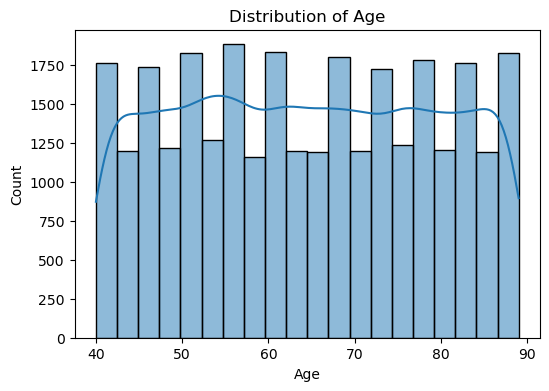

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


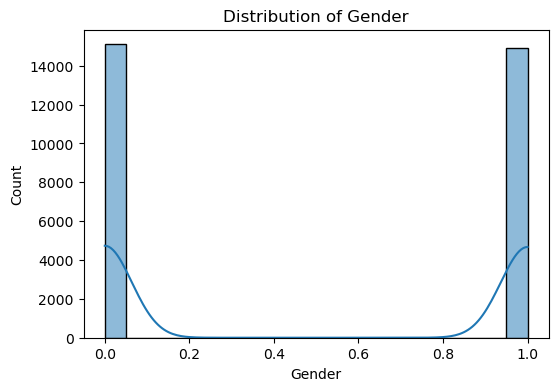

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


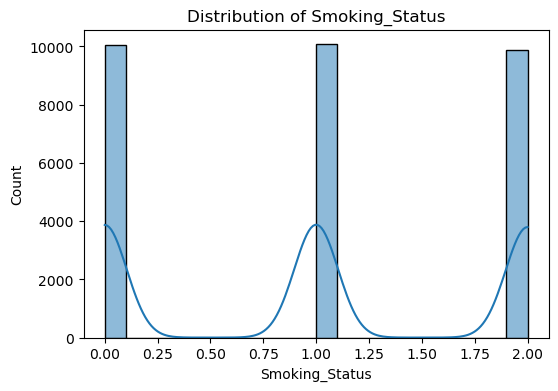

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


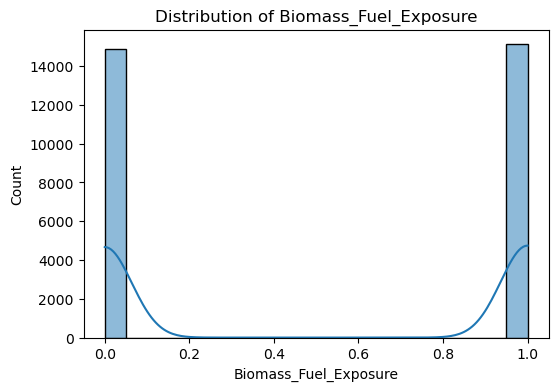

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


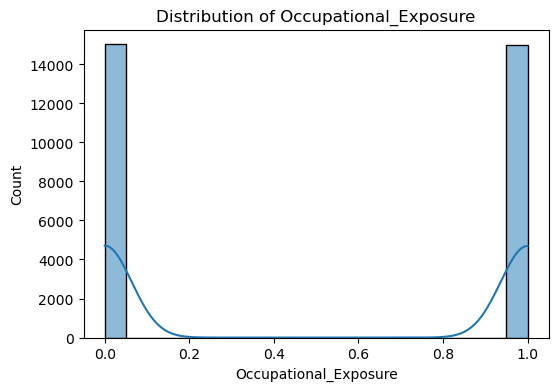

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


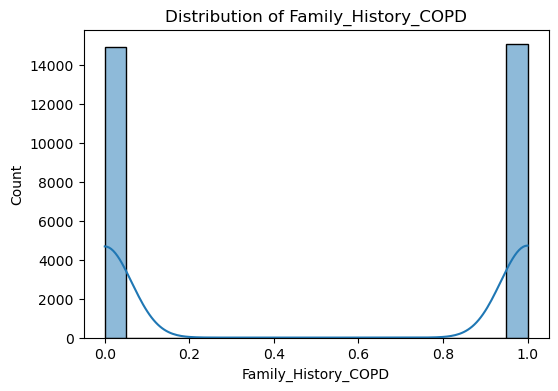

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


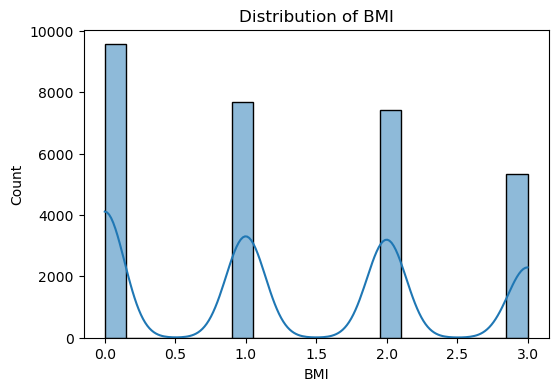

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


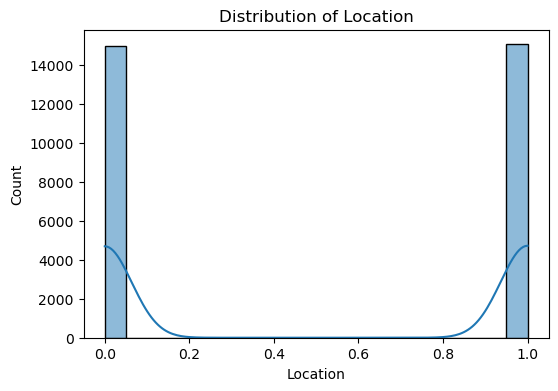

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


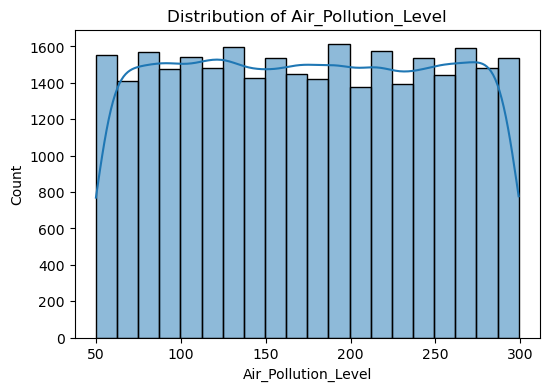

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


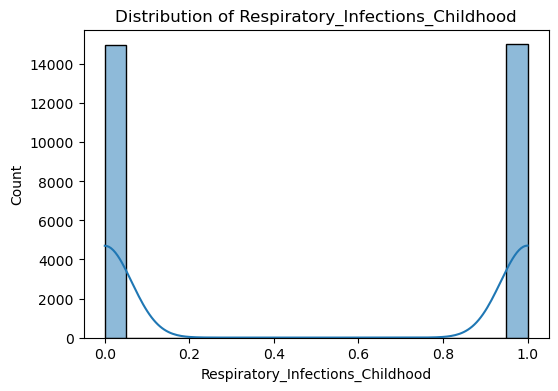

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


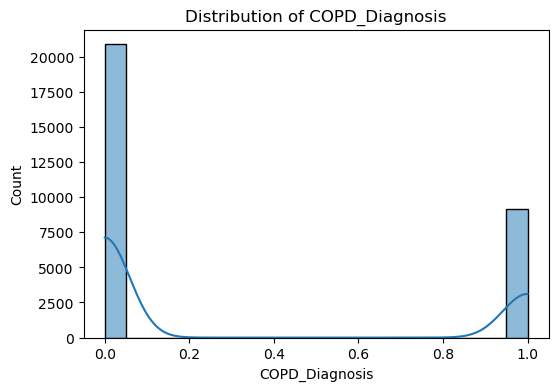

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


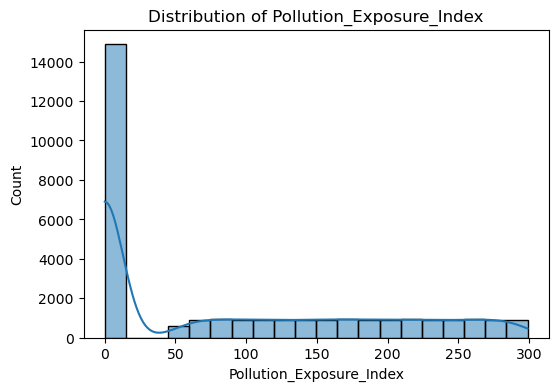

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


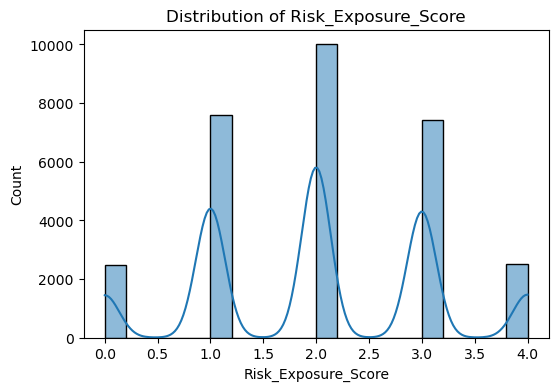

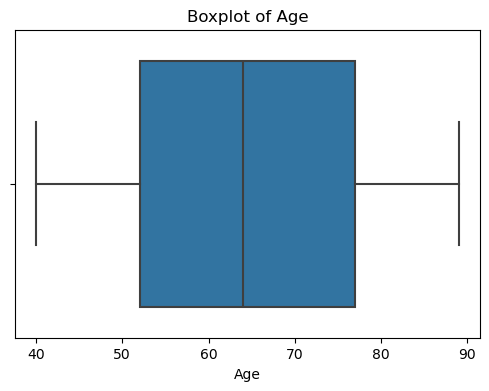

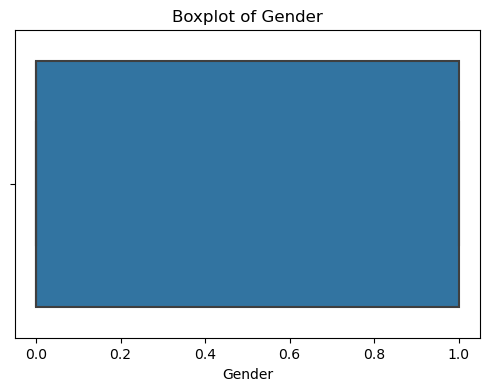

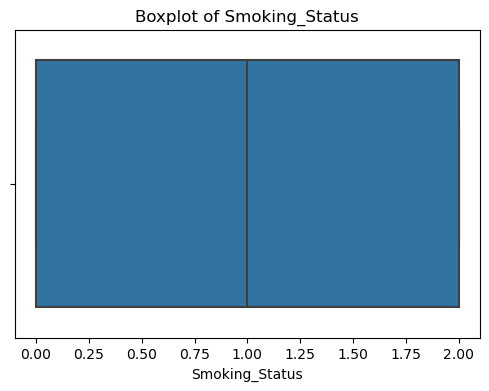

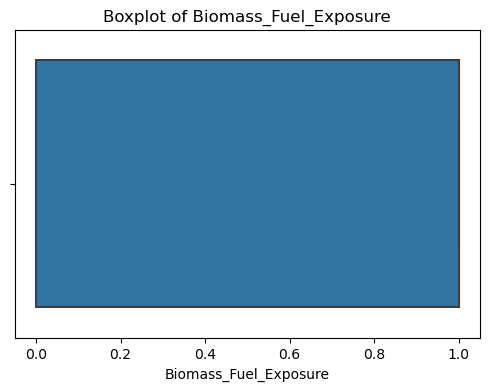

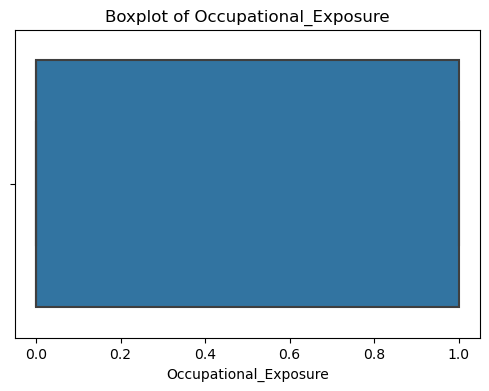

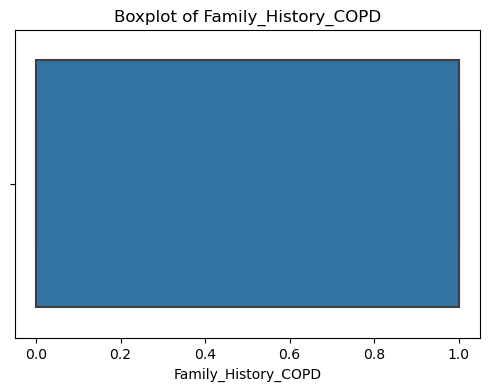

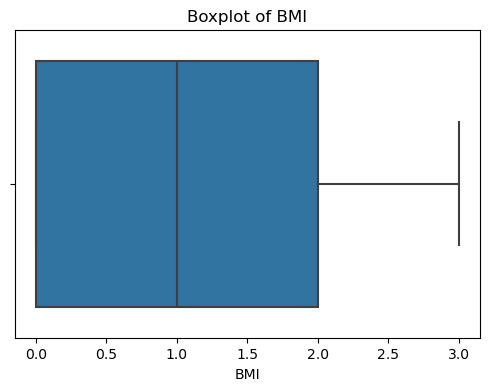

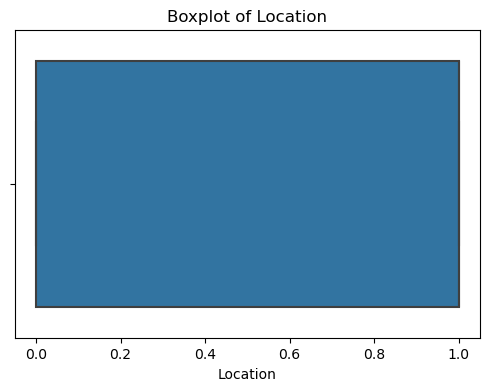

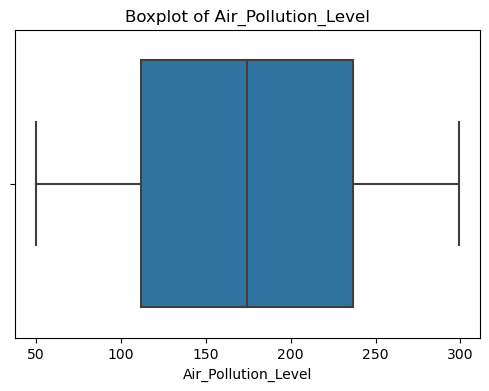

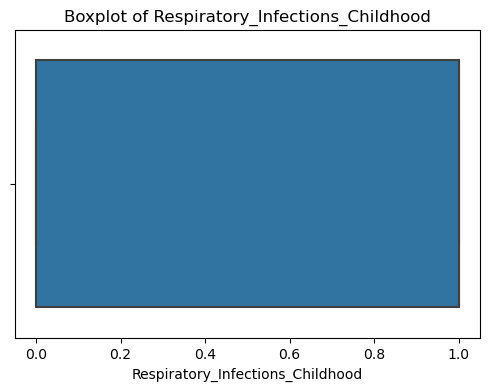

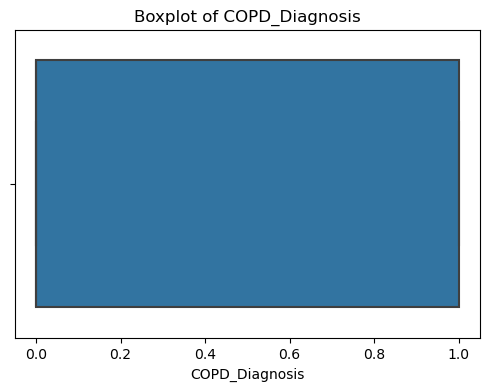

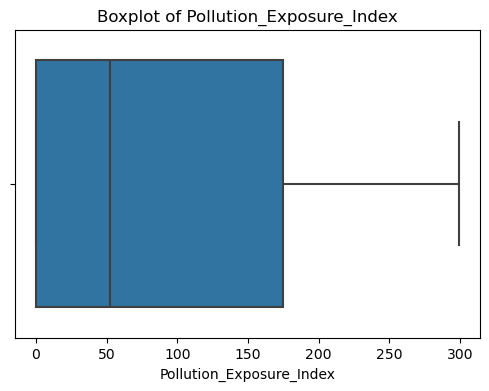

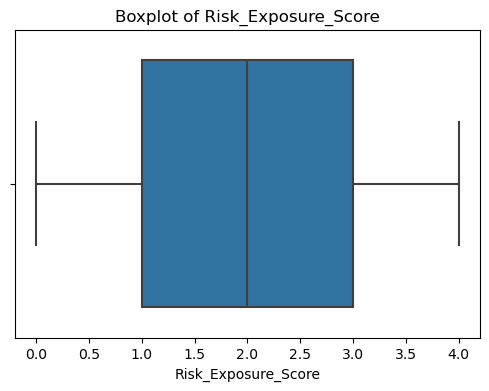

In [89]:
# List of all numerical features (including encoded features)
numerical_features = df.columns.tolist()

# Histograms for each feature
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.title(f"Distribution of {feature}")
    sns.histplot(df[feature], bins=20, kde=True)
    plt.show()

# Box plots for each feature
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.title(f"Boxplot of {feature}")
    sns.boxplot(x=df[feature])
    plt.show()

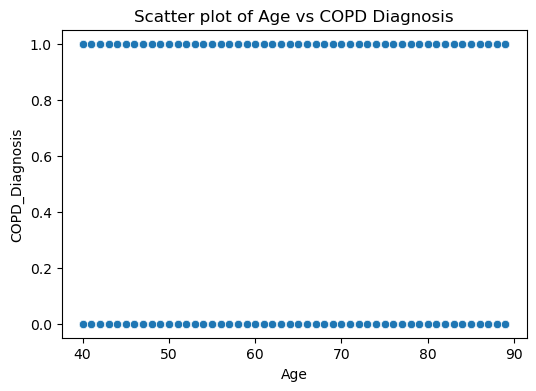

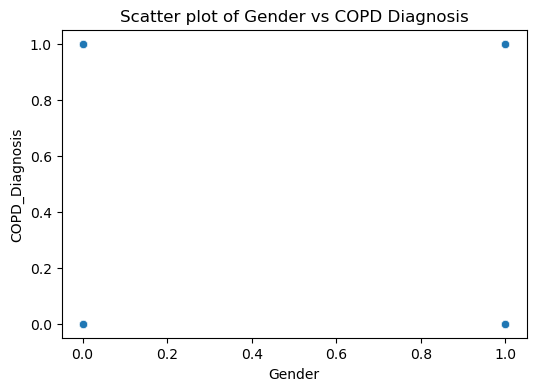

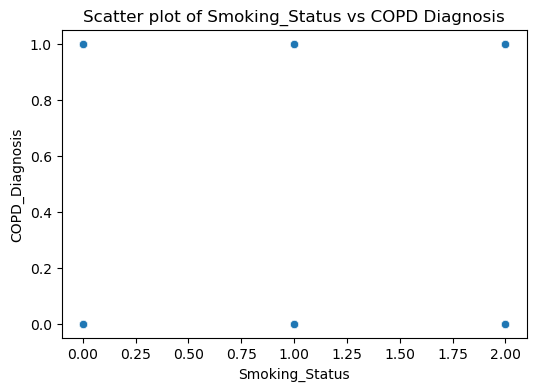

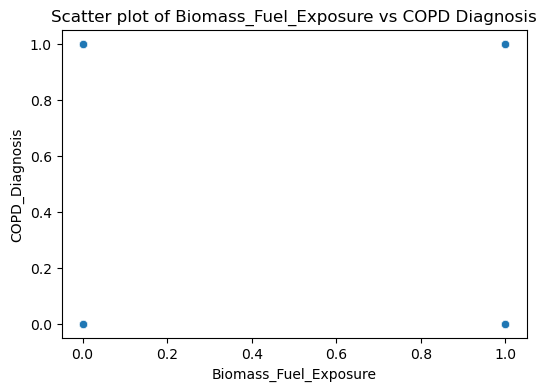

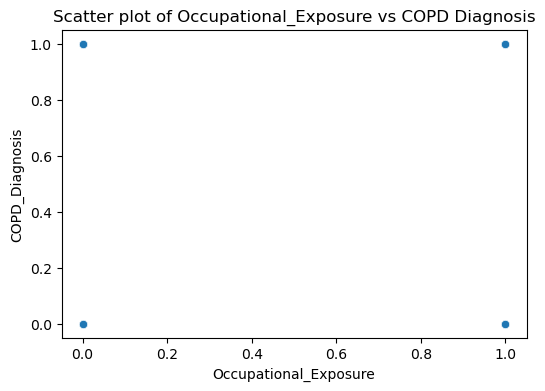

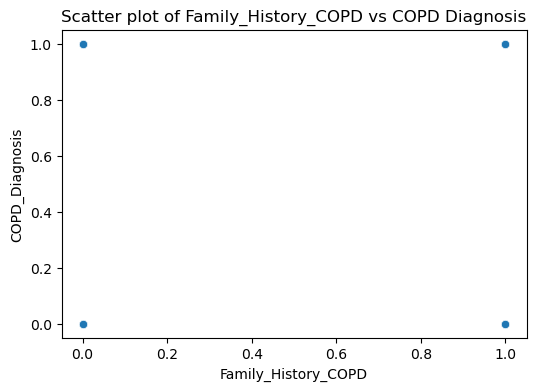

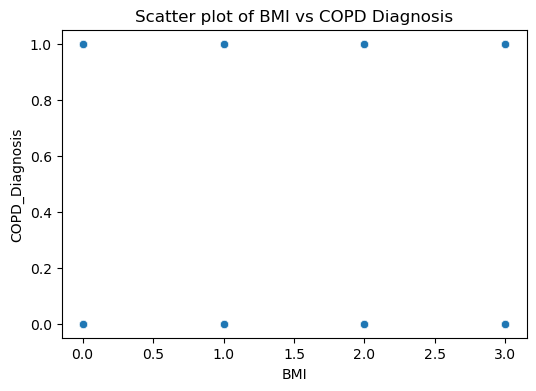

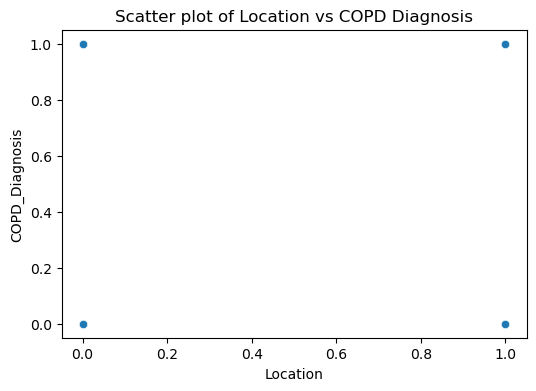

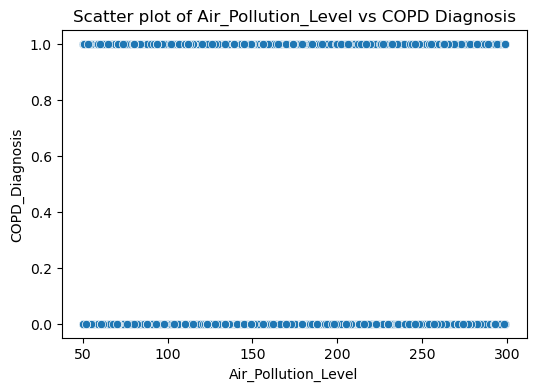

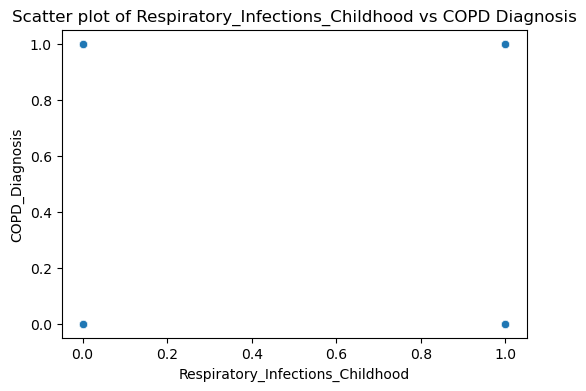

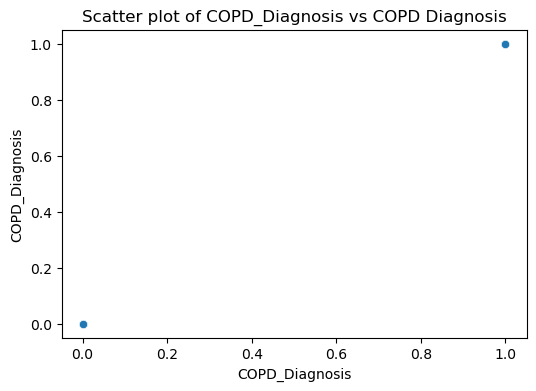

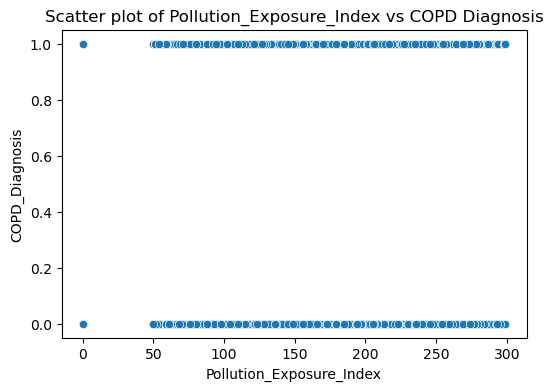

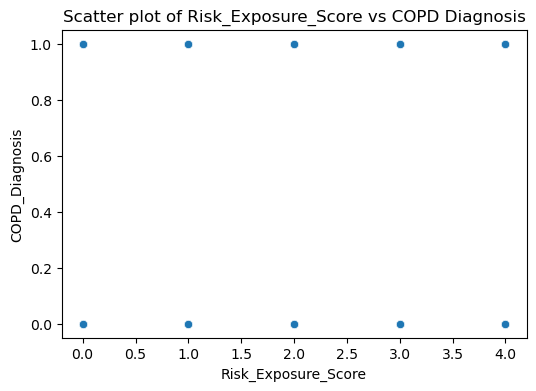

In [90]:
# Scatter plots for each feature vs COPD diagnosis
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.title(f"Scatter plot of {feature} vs COPD Diagnosis")
    sns.scatterplot(x=df[feature], y=df['COPD_Diagnosis'])
    plt.show()


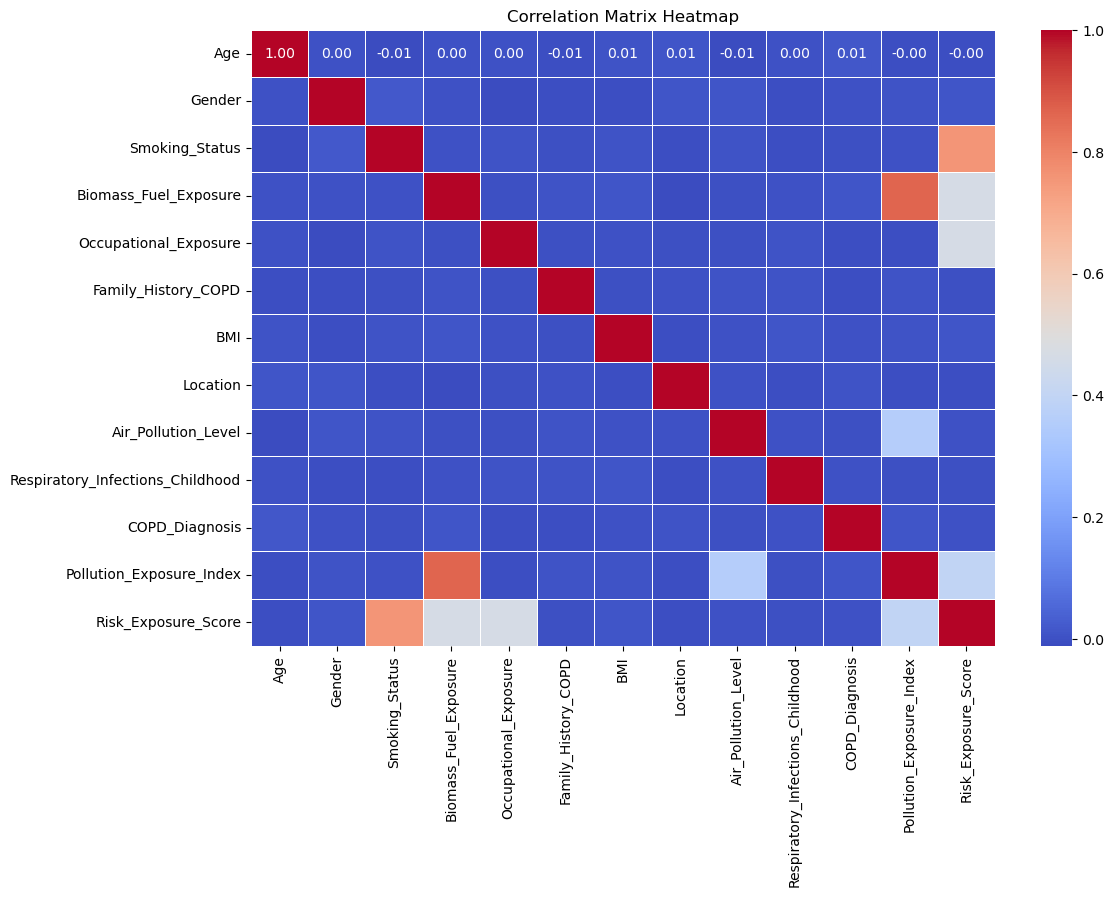

In [91]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()

# Heatmap for correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


Model develop ment

In [92]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import pickle

In [93]:
# Step 1: Split the dataset
X = df.drop('COPD_Diagnosis', axis=1)  # Features
y = df['COPD_Diagnosis']  # Target variable

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# Step 2: Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [95]:
# Step 3: Hyperparameter tuning with Grid Search
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
}
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_


Model: Logistic Regression


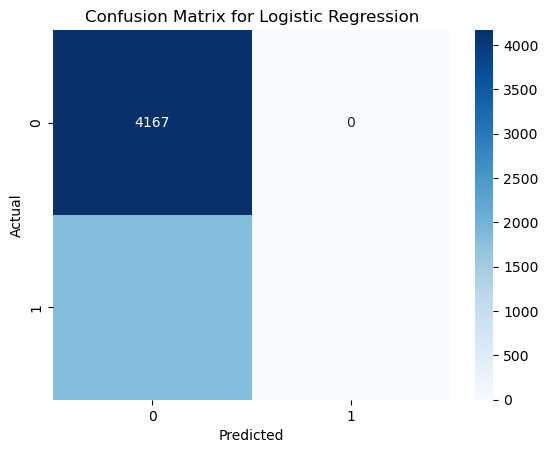

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      4167
           1       0.00      0.00      0.00      1833

    accuracy                           0.69      6000
   macro avg       0.35      0.50      0.41      6000
weighted avg       0.48      0.69      0.57      6000



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


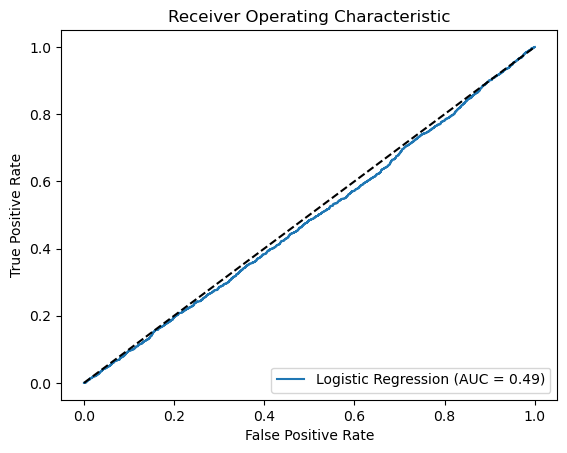

Accuracy: 0.69
Model: Decision Tree


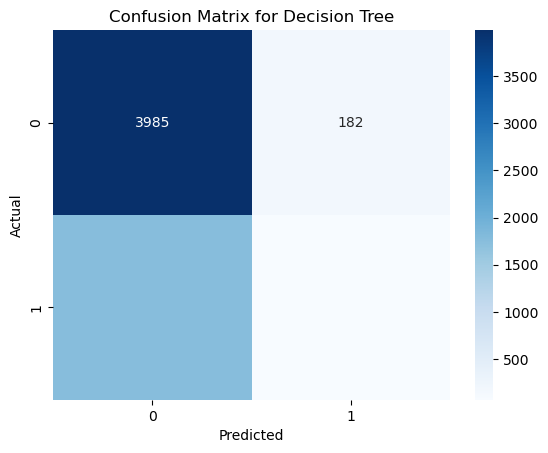

              precision    recall  f1-score   support

           0       0.69      0.96      0.80      4167
           1       0.28      0.04      0.07      1833

    accuracy                           0.68      6000
   macro avg       0.49      0.50      0.44      6000
weighted avg       0.57      0.68      0.58      6000



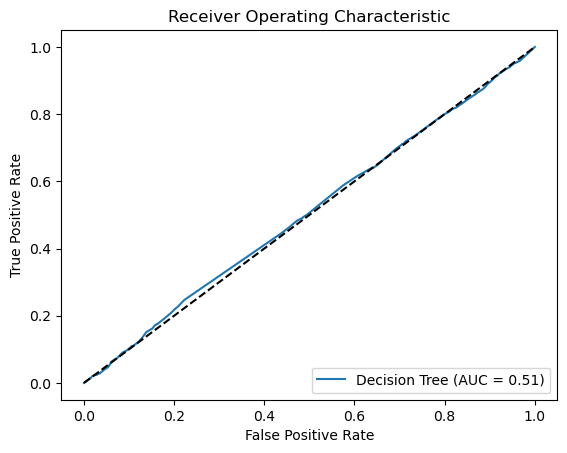

Accuracy: 0.68
Model: Random Forest


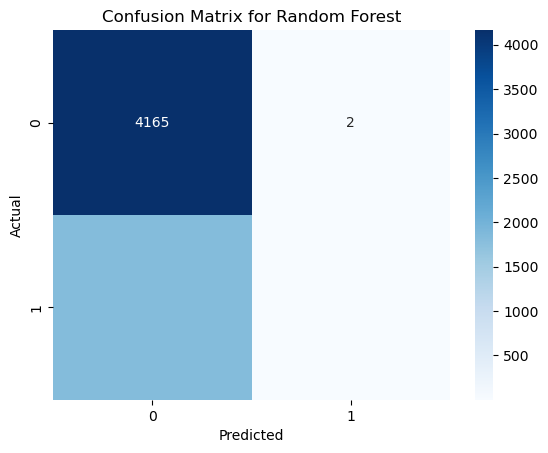

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      4167
           1       0.33      0.00      0.00      1833

    accuracy                           0.69      6000
   macro avg       0.51      0.50      0.41      6000
weighted avg       0.58      0.69      0.57      6000



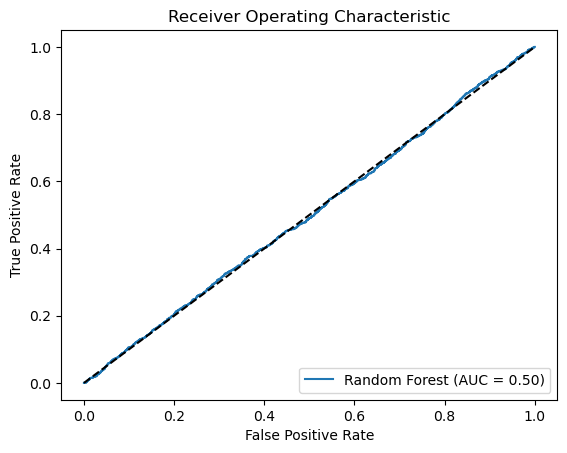

Accuracy: 0.69


In [96]:
# Step 4: Evaluate the models and save the best one
best_model_name = None
best_model_accuracy = 0

for model_name, model in best_models.items():
    print(f"Model: {model_name}")
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(classification_report(y_test, y_pred))
    
    # AUC-ROC
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    # Calculate accuracy for comparison
    accuracy = (y_pred == y_test).mean()
    print(f"Accuracy: {accuracy:.2f}")

    # Check if this is the best model
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = model_name
        best_model = model  # Save the best model for exporting

In [97]:
# Save the best model to a .pkl file
if best_model_name:
    with open(f'{best_model_name.replace(" ", "_")}.pkl', 'wb') as model_file:
        pickle.dump(best_model, model_file)

print(f"The best model is: {best_model_name} with an accuracy of {best_model_accuracy:.2f}")

The best model is: Logistic Regression with an accuracy of 0.69
